In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc

from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

import joblib

%matplotlib inline
pd.set_option('display.max_columns', 100)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be importe

# TELCOM CHURN PREDICTION | Model Optimizing

Goals: This project's aim is to predict whether the customer left the telecommunication services or continues to be a customer.<br>
[Datasets Source](https://www.kaggle.com/blastchar/telco-customer-churn)

## 1. Import Data

In [2]:
df = pd.read_csv("Telcom_Cleaned.csv")
df

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.160323,-0.994194,0
1,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,-0.259629,-0.173740,0
2,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.362660,-0.959649,1
3,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,-0.746535,-0.195248,0
4,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.197365,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,0.665992,-0.129180,0
7028,1.009559,-1.009559,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,1.277533,2.241056,0
7029,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.168632,-0.854514,0
7030,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.320338,-0.872095,1


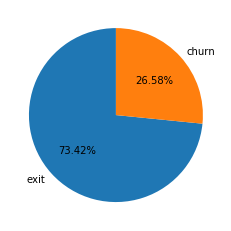

In [3]:
piedata = [len(df[df['Churn']==0]), len(df[df['Churn']==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## 2. Checking Best Correlation

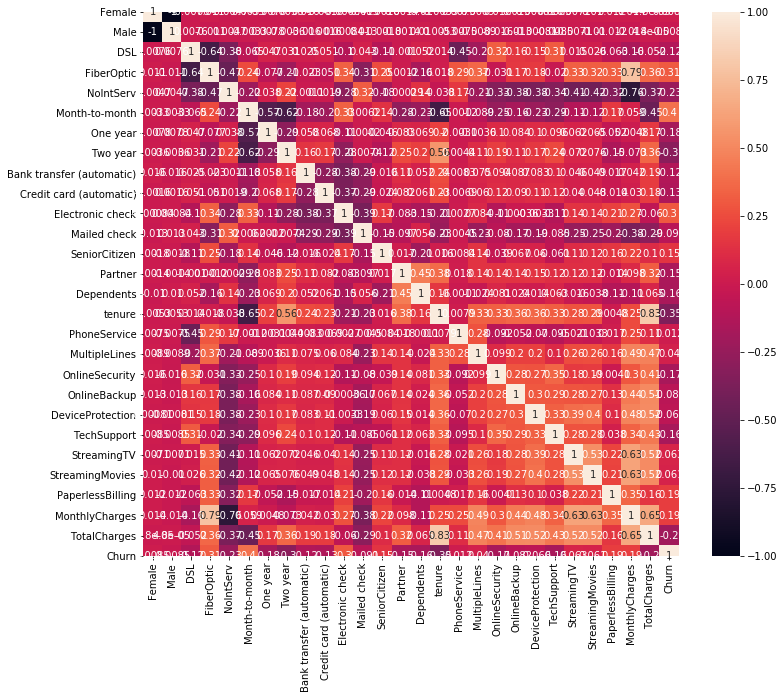

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [5]:
df.corr()['Churn'].sort_values(ascending=False)

Churn                        1.000000
Month-to-month               0.404565
FiberOptic                   0.307463
Electronic check             0.301455
MonthlyCharges               0.192858
PaperlessBilling             0.191454
SeniorCitizen                0.150541
StreamingTV                  0.063254
StreamingMovies              0.060860
MultipleLines                0.040033
PhoneService                 0.011691
Female                       0.008545
Male                        -0.008545
DeviceProtection            -0.066193
OnlineBackup                -0.082307
Mailed check                -0.090773
Bank transfer (automatic)   -0.118136
DSL                         -0.124141
Credit card (automatic)     -0.134687
Partner                     -0.149982
Dependents                  -0.163128
TechSupport                 -0.164716
OnlineSecurity              -0.171270
One year                    -0.178225
TotalCharges                -0.199484
NoIntServ                   -0.227578
Two year    

Features that have big correlation:
* Month-to-month [Contract] (40.45%)
* Tenure (35.40%)
* FiberOptic [InternetServices] (30.74%)
* Two year [Contract] (30.15%)
* Electronic check [PaymentMethod] (30.14%)
* NoIntServ [InternetServices] (22.75%)

## 3. Splitting Data

In [6]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [8]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

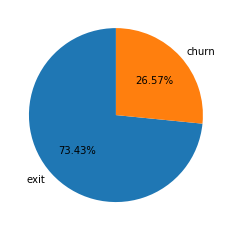

In [9]:
piedata = [len(y_train[y_train==0]), len(y_train[y_train==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

We can see that `churn` and `exit` data is not balance, so I consider to use SMOTE.

## 4. SMOTE

In [10]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



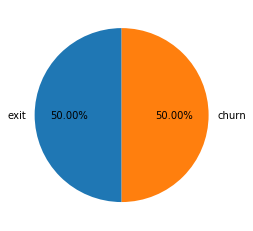

In [11]:
piedata = [len(y_sm[y_sm==0]), len(y_sm[y_sm==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

Now, we have balance data. So, let's get to started to train with the model! :)

## 5. Random Over Sampling

In [12]:
df_copy = df.copy()
new_int = []
for i in df_copy['Churn']:
    if i == 'No':
        new_int.append(0)
    else:
        new_int.append(1)
df_copy['Churn']=new_int
df_copy.dropna(axis=0,inplace=True)
df_copy

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.160323,-0.994194,1
1,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,-0.259629,-0.173740,1
2,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.362660,-0.959649,1
3,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,-0.746535,-0.195248,1
4,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.197365,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,0.665992,-0.129180,1
7028,1.009559,-1.009559,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,1.277533,2.241056,1
7029,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.168632,-0.854514,1
7030,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.320338,-0.872095,1


In [13]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
3939,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-0.951682,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,-1.205113,-0.208113,-0.769188,1
3388,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-0.259435,0.327438,1.170719,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,-0.106744,-0.309427,0
1630,1.009559,-1.009559,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.196004,0.327438,-0.854176,-0.633933,-0.725563,1.381277,-0.639439,1.265612,1.256171,0.829798,0.172438,-0.910104,0
4081,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.033122,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,0.293749,-0.777946,1
1881,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,-0.514249,1.776278,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,1.034530,1.529024,1.410099,0.327438,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,0.829798,-0.144965,0.736959,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,-1.196004,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,-0.477324,-0.946811,0
5191,1.009559,-1.009559,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,0.758574,0.327438,1.170719,-0.633933,1.378241,1.381277,1.563872,1.265612,1.256171,0.829798,1.553392,1.508839,0
5226,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-0.951682,0.327438,1.170719,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.544681,-0.661274,0
5390,1.009559,-1.009559,-0.723740,-0.885660,1.901403,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,0.717853,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,-1.496006,-0.571007,0


In [14]:
retain= df_train[df_train['Churn']==1]
exit=df_train[df_train['Churn']==0]

In [15]:
retain['Churn'].value_counts().unique()

array([1308], dtype=int64)

In [16]:
exit['Churn'].value_counts().unique()

array([3614], dtype=int64)

In [17]:
retain_sample = resample(retain,replace=True,n_samples=len(exit),random_state=42)

In [18]:
retain_sample

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
3719,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.277445,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.200689,-0.976127,1
3760,1.009559,-1.009559,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,2.273159,-0.966622,-0.654012,-1.277445,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,0.829798,-0.297850,-0.982745,1
1899,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,0.962175,0.327438,1.170719,-0.633933,1.378241,-0.723968,1.563872,-0.790132,1.256171,0.829798,0.986719,1.253546,1
1542,1.009559,-1.009559,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,1.034530,-0.654012,1.247218,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,1.420448,2.025249,1
5713,1.009559,-1.009559,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,2.273159,1.034530,-0.654012,-0.218715,0.327438,1.170719,1.577454,-0.725563,-0.723968,1.563872,1.265612,1.256171,0.829798,1.314093,0.257852,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,2.273159,-0.966622,-0.654012,-0.992402,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.164129,-0.759924,1
4947,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.277445,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,0.154159,-0.976745,1
1331,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.656798,-0.964811,1
134,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,-0.678402,-0.971517,1


In [19]:
upsample_df = pd.concat([exit,retain_sample])
upsample_df

,Female,Male,DSL,FiberOptic,NoIntServ,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
3388,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-0.259435,0.327438,1.170719,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,-0.106744,-0.309427,0
1630,1.009559,-1.009559,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.196004,0.327438,-0.854176,-0.633933,-0.725563,1.381277,-0.639439,1.265612,1.256171,0.829798,0.172438,-0.910104,0
1881,-0.990532,0.990532,1.381712,-0.885660,-0.525927,-1.105970,-0.514249,1.776278,1.887201,-0.525047,-0.711026,-0.544807,-0.439916,1.034530,1.529024,1.410099,0.327438,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,0.829798,-0.144965,0.736959,0
5141,1.009559,-1.009559,-0.723740,-0.885660,1.901403,-1.105970,-0.514249,1.776278,-0.529885,1.904590,-0.711026,-0.544807,-0.439916,-0.966622,-0.654012,1.206498,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.514286,-0.511623,0
1612,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-0.218715,0.327438,1.170719,-0.633933,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,-0.176539,-0.296324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,2.273159,-0.966622,-0.654012,-0.992402,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.164129,-0.759924,1
4947,-0.990532,0.990532,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.277445,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,0.154159,-0.976745,1
1331,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.656798,-0.964811,1
134,-0.990532,0.990532,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-1.205113,-0.678402,-0.971517,1


In [20]:
X_up=upsample_df.drop('Churn',axis=1)
y_up=upsample_df['Churn']

In [21]:
upsample_df['Churn'].value_counts()

1    3614
0    3614
Name: Churn, dtype: int64

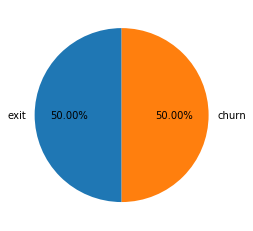

In [22]:
piedata = [len(y_up[y_up==0]), len(y_up[y_up==1])]
labels = ['exit', 'churn']

plt.pie(piedata, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## 6. Model Building

For optimizing the result, I am using `hyperparameter tuning` by creating function to deciding the best parameter score when building the model. Also, I am using `non-SMOTE` when training the model to compare the result for deciding which one is the best.

### 6.1. Logistic Regression

#### 6.1.1. Non-SMOTE

In [23]:
lr = LogisticRegression()

In [24]:
lr_params = {
    'C': [0.1, 0.5, 0.9, 1, 2, 5],
    'penalty':['l1','l2'],
    'random_state':[24,32,56,65]
}
logreg_random = RandomizedSearchCV(estimator= lr,
                              param_distributions= lr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
logreg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   scoring='roc_auc')

In [25]:
logreg_random.best_params_

{'random_state': 32, 'penalty': 'l2', 'C': 2}

In [26]:
logreg_random.best_estimator_.score(X_test, y_test)

0.7943127962085308

In [27]:
best_lr = logreg_random.best_estimator_

predict_lr = best_lr.predict(X_test)
proba_lr = best_lr.predict_proba(X_test)
print(classification_report(y_test, predict_lr))
print(confusion_matrix(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110

[[1375  174]
 [ 260  301]]


#### 6.1.2. SMOTE

In [28]:
lrsm_random = RandomizedSearchCV(estimator= lr,
                              param_distributions= lr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
lrsm_random.fit(X_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   scoring='roc_auc')

In [29]:
lrsm_random.best_params_

{'random_state': 32, 'penalty': 'l2', 'C': 5}

In [30]:
lrsm_random.best_estimator_.score(X_test, y_test)

0.747867298578199

In [31]:
best_lrsm = lrsm_random.best_estimator_

predict_lrsm = best_lrsm.predict(X_test)
proba_lrsm = best_lrsm.predict_proba(X_test)
print(classification_report(y_test, predict_lrsm))
print(confusion_matrix(y_test, predict_lrsm))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

[[1126  423]
 [ 109  452]]


#### 6.1.3. Oversampling

In [32]:
lrup_random = RandomizedSearchCV(estimator= lr,
                              param_distributions= lr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
lrup_random.fit(X_up, y_up)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   scoring='roc_auc')

In [33]:
lrup_random.best_params_

{'random_state': 32, 'penalty': 'l2', 'C': 5}

In [34]:
lrup_random.best_estimator_.score(X_test, y_test)

0.7402843601895734

In [35]:
best_lrup = lrup_random.best_estimator_

predict_lrup = best_lrup.predict(X_test)
proba_lrup = best_lrup.predict_proba(X_test)
print(classification_report(y_test, predict_lrup))
print(confusion_matrix(y_test, predict_lrup))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.81      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

[[1110  439]
 [ 109  452]]


### 6.2. K-Nearest Neighbour

#### 6.2.1. Non-SMOTE

In [36]:
knn = KNeighborsClassifier()

In [37]:
k = round(X_train.shape[0] ** .5)
if k % 2 == 0:
    k+=1
    
n_neighbors = list(range(k-5, k+5))
algo = ["ball_tree", "kd_tree", "brute", "auto"]

paramKNN = {
    "n_neighbors": n_neighbors,
    "algorithm": algo,
    "leaf_size" : [30],
    "metric" : ['minkowski'],
    "metric_params" : [None],
    "n_jobs" : [None],
    "p": [2], "weights" : ["uniform"]
}

knn_random = RandomizedSearchCV(estimator= knn, param_distributions= paramKNN, cv= 5, scoring='roc_auc')
knn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [66, 67, 68, 69, 70, 71,
                                                        72, 73, 74, 75],
                                        'p': [2], 'weights': ['uniform']},
                   scoring='roc_auc')

In [38]:
knn_random.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 75,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'brute'}

In [39]:
knn_random.best_estimator_.score(X_test, y_test)

0.7838862559241706

In [40]:
best_knn = knn_random.best_estimator_

predict_knn = best_knn.predict(X_test)
proba_knn = best_knn.predict_proba(X_test)
print(classification_report(y_test, predict_knn))
print(confusion_matrix(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1549
           1       0.59      0.60      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

[[1319  230]
 [ 226  335]]


#### 6.2.2. SMOTE

In [41]:
knnsm_random = RandomizedSearchCV(estimator= knn, param_distributions= paramKNN, cv= 5, scoring='roc_auc')
knnsm_random.fit(X_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [66, 67, 68, 69, 70, 71,
                                                        72, 73, 74, 75],
                                        'p': [2], 'weights': ['uniform']},
                   scoring='roc_auc')

In [42]:
knnsm_random.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 66,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'auto'}

In [43]:
knnsm_random.best_estimator_.score(X_test, y_test)

0.6881516587677725

In [44]:
best_knnsm = knnsm_random.best_estimator_

predict_knnsm = best_knnsm.predict(X_test)
proba_knnsm = best_knnsm.predict_proba(X_test)
print(classification_report(y_test, predict_knnsm))
print(confusion_matrix(y_test, predict_knnsm))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1549
           1       0.45      0.84      0.59       561

    accuracy                           0.69      2110
   macro avg       0.69      0.74      0.67      2110
weighted avg       0.79      0.69      0.71      2110

[[979 570]
 [ 88 473]]


#### 6.2.3. Oversampling

In [45]:
knnup_random = RandomizedSearchCV(estimator= knn, param_distributions= paramKNN, cv= 5, scoring='roc_auc')
knnup_random.fit(X_up, y_up)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [66, 67, 68, 69, 70, 71,
                                                        72, 73, 74, 75],
                                        'p': [2], 'weights': ['uniform']},
                   scoring='roc_auc')

In [46]:
knnup_random.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 75,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'brute'}

In [47]:
knnup_random.best_estimator_.score(X_test, y_test)

0.7004739336492891

In [48]:
best_knnup = knnup_random.best_estimator_

predict_knnup = best_knnup.predict(X_test)
proba_knnup = best_knnup.predict_proba(X_test)
print(classification_report(y_test, predict_knnup))
print(confusion_matrix(y_test, predict_knnup))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1549
           1       0.46      0.83      0.60       561

    accuracy                           0.70      2110
   macro avg       0.69      0.74      0.68      2110
weighted avg       0.80      0.70      0.72      2110

[[1011  538]
 [  94  467]]


### 6.3. Decision Tree Classifier

#### 6.3.1. Non-SMOTE

In [49]:
dtr = DecisionTreeClassifier()

In [50]:
dtr_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,20,30,40],
    'min_samples_split': [4,5,6,7,8,9],
    'max_features': ['auto', 'sqrt', 'log2']
}
dtr_random = RandomizedSearchCV(estimator= dtr,
                              param_distributions= dtr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
dtr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 5, 6, 7, 8,
                                                              9]},
                   scoring='roc_auc')

In [51]:
dtr_random.best_params_

{'min_samples_split': 9,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'entropy'}

In [52]:
dtr_random.best_estimator_.score(X_test, y_test)

0.771563981042654

In [53]:
best_dtr = dtr_random.best_estimator_

predict_dtr = best_dtr.predict(X_test)
proba_dtr = best_dtr.predict_proba(X_test)
print(classification_report(y_test, predict_dtr))
print(confusion_matrix(y_test, predict_dtr))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.58      0.51      0.54       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110

[[1341  208]
 [ 274  287]]


#### 6.3.2. SMOTE

In [54]:
dtrsm_random = RandomizedSearchCV(estimator= dtr,
                              param_distributions= dtr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
dtrsm_random.fit(X_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 5, 6, 7, 8,
                                                              9]},
                   scoring='roc_auc')

In [55]:
dtrsm_random.best_params_

{'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [56]:
dtrsm_random.best_estimator_.score(X_test, y_test)

0.7270142180094786

In [57]:
best_dtrsm = dtrsm_random.best_estimator_

predict_dtrsm = best_dtrsm.predict(X_test)
proba_dtrsm = best_dtrsm.predict_proba(X_test)
print(classification_report(y_test, predict_dtrsm))
print(confusion_matrix(y_test, predict_dtrsm))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1549
           1       0.49      0.69      0.57       561

    accuracy                           0.73      2110
   macro avg       0.68      0.71      0.69      2110
weighted avg       0.77      0.73      0.74      2110

[[1148  401]
 [ 175  386]]


#### 6.3.3. Oversampling

In [58]:
dtrup_random = RandomizedSearchCV(estimator= dtr,
                              param_distributions= dtr_params,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
dtrup_random.fit(X_up, y_up)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 5, 6, 7, 8,
                                                              9]},
                   scoring='roc_auc')

In [59]:
dtrup_random.best_params_

{'min_samples_split': 7,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'gini'}

In [60]:
dtrup_random.best_estimator_.score(X_test, y_test)

0.7274881516587678

In [61]:
best_dtrup = dtrsm_random.best_estimator_

predict_dtrup = best_dtrup.predict(X_test)
proba_dtrup = best_dtrup.predict_proba(X_test)
print(classification_report(y_test, predict_dtrup))
print(confusion_matrix(y_test, predict_dtrup))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1549
           1       0.49      0.69      0.57       561

    accuracy                           0.73      2110
   macro avg       0.68      0.71      0.69      2110
weighted avg       0.77      0.73      0.74      2110

[[1148  401]
 [ 175  386]]


### 6.4. Random Forest

#### 6.4.1. Non-SMOTE

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfc_param = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [int(x) for x in np.arange(10,50,10)],
    'min_samples_split' : [int(x) for x in np.arange(2,10,1)],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=20)]
}

rfc_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= rfc_param,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
rfc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]},
                   scoring='roc_auc')

In [64]:
rfc_random.best_params_

{'n_estimators': 384,
 'min_samples_split': 7,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [65]:
rfc_random.best_estimator_.score(X_test, y_test)

0.79478672985782

In [66]:
best_rfc = rfc_random.best_estimator_

predict_rfc = best_rfc.predict(X_test)
proba_rfc = best_rfc.predict_proba(X_test)
print(classification_report(y_test, predict_rfc))
print(confusion_matrix(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110

[[1397  152]
 [ 281  280]]


#### 6.4.2. SMOTE

In [67]:
rfcsm_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= rfc_param,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
rfcsm_random.fit(X_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]},
                   scoring='roc_auc')

In [68]:
rfcsm_random.best_params_

{'n_estimators': 384,
 'min_samples_split': 7,
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': False}

In [69]:
rfcsm_random.best_estimator_.score(X_test,y_test)

0.7729857819905214

In [70]:
best_rfcsm = rfcsm_random.best_estimator_

predict_rfcsm = best_rfcsm.predict(X_test)
proba_rfcsm = best_rfcsm.predict_proba(X_test)
print(classification_report(y_test, predict_rfcsm))
print(confusion_matrix(y_test, predict_rfcsm))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1549
           1       0.57      0.59      0.58       561

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.71      2110
weighted avg       0.78      0.77      0.77      2110

[[1298  251]
 [ 228  333]]


#### 6.4.3. Oversampling

In [71]:
rfcup_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= rfc_param,
                              n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
rfcup_random.fit(X_up, y_up)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]},
                   scoring='roc_auc')

In [72]:
rfcup_random.best_params_

{'n_estimators': 526,
 'min_samples_split': 2,
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [73]:
rfcup_random.best_estimator_.score(X_test,y_test)

0.7744075829383886

In [74]:
best_rfcup = rfcup_random.best_estimator_

predict_rfcup = best_rfcup.predict(X_test)
proba_rfcup = best_rfcup.predict_proba(X_test)
print(classification_report(y_test, predict_rfcup))
print(confusion_matrix(y_test, predict_rfcup))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.44      0.51       561

    accuracy                           0.77      2110
   macro avg       0.71      0.67      0.68      2110
weighted avg       0.76      0.77      0.76      2110

[[1385  164]
 [ 312  249]]


### 6.5. Comparing The Score

#### 6.5.1. Non-SMOTE

In [75]:
scores = []
for model in [best_lr, best_knn, best_dtr, best_rfc]:
    scores.append(model.score(X_test, y_test))

scores_df = pd.DataFrame({'model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest'], 'scores': scores})
scores_df

,model,scores
0,Logistic Regression,0.794313
1,K-Nearest Neighbour,0.783886
2,Decision Tree,0.771564
3,Random Forest,0.794787


#### 6.5.2. SMOTE

In [76]:
scores = []
for model in [best_lrsm, best_knnsm, best_dtrsm, best_rfcsm]:
    scores.append(model.score(X_sm, y_sm))

scores_dfsm = pd.DataFrame({'model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest'], 'scores': scores})
scores_dfsm

,model,scores
0,Logistic Regression,0.779192
1,K-Nearest Neighbour,0.770891
2,Decision Tree,0.840897
3,Random Forest,0.986995


#### 6.5.3. Oversampling

In [77]:
scores = []
for model in [best_lrup, best_knnup, best_dtrup, best_rfcup]:
    scores.append(model.score(X_up, y_up))

scores_dfup = pd.DataFrame({'model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest'], 'scores': scores})
scores_dfup

,model,scores
0,Logistic Regression,0.765495
1,K-Nearest Neighbour,0.758578
2,Decision Tree,0.807416
3,Random Forest,0.999170


## 7. Evaluation Metrics

### Logistic Regression

#### >> Non-SMOTE

In [79]:
cm_lr = confusion_matrix(y_test, predict_lr)
cr_lr = classification_report(y_test, predict_lr, output_dict=True)
cr_lr = pd.DataFrame(cr_lr).transpose()
cr_lr

,precision,recall,f1-score,support
0,0.840979,0.887669,0.863693,1549.000000
1,0.633684,0.536542,0.581081,561.000000
accuracy,0.794313,0.794313,0.794313,0.794313
macro avg,0.737331,0.712106,0.722387,2110.000000
weighted avg,0.785864,0.794313,0.788553,2110.000000


#### >> SMOTE

In [81]:
cm_lrsm = confusion_matrix(y_test, predict_lrsm)
cr_lrsm = classification_report(y_test, predict_lrsm, output_dict=True)
cr_lrsm = pd.DataFrame(cr_lrsm).transpose()
cr_lrsm

,precision,recall,f1-score,support
0,0.911741,0.726921,0.808908,1549.000000
1,0.516571,0.805704,0.629526,561.000000
accuracy,0.747867,0.747867,0.747867,0.747867
macro avg,0.714156,0.766312,0.719217,2110.000000
weighted avg,0.806675,0.747867,0.761215,2110.000000


#### >> Oversampling

In [83]:
cm_lrup = confusion_matrix(y_test, predict_lrup)
cr_lrup = classification_report(y_test, predict_lrup, output_dict=True)
cr_lrup = pd.DataFrame(cr_lrup).transpose()
cr_lrup

,precision,recall,f1-score,support
0,0.910582,0.716591,0.802023,1549.000000
1,0.507295,0.805704,0.622590,561.000000
accuracy,0.740284,0.740284,0.740284,0.740284
macro avg,0.708939,0.761148,0.712306,2110.000000
weighted avg,0.803358,0.740284,0.754316,2110.000000


### K-Nearest Neighbour

#### >> Non-SMOTE

In [84]:
cm_knn = confusion_matrix(y_test, predict_knn)
cr_knn = classification_report(y_test, predict_knn, output_dict=True)
cr_knn = pd.DataFrame(cr_knn).transpose()
cr_knn

,precision,recall,f1-score,support
0,0.853722,0.851517,0.852618,1549.000000
1,0.592920,0.597148,0.595027,561.000000
accuracy,0.783886,0.783886,0.783886,0.783886
macro avg,0.723321,0.724333,0.723822,2110.000000
weighted avg,0.784381,0.783886,0.784130,2110.000000


#### >> SMOTE

In [85]:
cm_knnsm = confusion_matrix(y_test, predict_knnsm)
cr_knnsm = classification_report(y_test, predict_knnsm, output_dict=True)
cr_knnsm = pd.DataFrame(cr_knnsm).transpose()
cr_knnsm

,precision,recall,f1-score,support
0,0.917526,0.632021,0.748471,1549.000000
1,0.453500,0.843137,0.589776,561.000000
accuracy,0.688152,0.688152,0.688152,0.688152
macro avg,0.685513,0.737579,0.669123,2110.000000
weighted avg,0.794152,0.688152,0.706278,2110.000000


#### >> Oversampling

In [86]:
cm_knnup = confusion_matrix(y_test, predict_knnup)
cr_knnup = classification_report(y_test, predict_knnup, output_dict=True)
cr_knnup = pd.DataFrame(cr_knnup).transpose()
cr_knnup

,precision,recall,f1-score,support
0,0.914932,0.652679,0.761869,1549.000000
1,0.464677,0.832442,0.596424,561.000000
accuracy,0.700474,0.700474,0.700474,0.700474
macro avg,0.689804,0.742561,0.679146,2110.000000
weighted avg,0.795220,0.700474,0.717881,2110.000000


### Decision Tree

#### >> Non-SMOTE

In [87]:
cm_dtr = confusion_matrix(y_test, predict_dtr)
cr_dtr = classification_report(y_test, predict_dtr, output_dict=True)
cr_dtr = pd.DataFrame(cr_dtr).transpose()
cr_dtr

,precision,recall,f1-score,support
0,0.830341,0.865720,0.847661,1549.000000
1,0.579798,0.511586,0.543561,561.000000
accuracy,0.771564,0.771564,0.771564,0.771564
macro avg,0.705069,0.688653,0.695611,2110.000000
weighted avg,0.763727,0.771564,0.766808,2110.000000


#### >> SMOTE

In [88]:
cm_dtrsm = confusion_matrix(y_test, predict_dtrsm)
cr_dtrsm = classification_report(y_test, predict_dtrsm, output_dict=True)
cr_dtrsm = pd.DataFrame(cr_dtrsm).transpose()
cr_dtrsm

,precision,recall,f1-score,support
0,0.867725,0.741123,0.799443,1549.000000
1,0.490470,0.688057,0.572700,561.000000
accuracy,0.727014,0.727014,0.727014,0.727014
macro avg,0.679098,0.714590,0.686072,2110.000000
weighted avg,0.767422,0.727014,0.739157,2110.000000


#### >> Oversampling

In [89]:
cm_dtrup = confusion_matrix(y_test, predict_dtrup)
cr_dtrup = classification_report(y_test, predict_dtrup, output_dict=True)
cr_dtrup = pd.DataFrame(cr_dtrup).transpose()
cr_dtrup

,precision,recall,f1-score,support
0,0.867725,0.741123,0.799443,1549.000000
1,0.490470,0.688057,0.572700,561.000000
accuracy,0.727014,0.727014,0.727014,0.727014
macro avg,0.679098,0.714590,0.686072,2110.000000
weighted avg,0.767422,0.727014,0.739157,2110.000000


### Random Forest

#### >> Non-SMOTE

In [91]:
cm_rfc = confusion_matrix(y_test, predict_rfc)
cr_rfc = classification_report(y_test, predict_rfc, output_dict=True)
cr_rfc = pd.DataFrame(cr_rfc).transpose()
cr_rfc

,precision,recall,f1-score,support
0,0.832539,0.901872,0.865820,1549.000000
1,0.648148,0.499109,0.563948,561.000000
accuracy,0.794787,0.794787,0.794787,0.794787
macro avg,0.740343,0.700490,0.714884,2110.000000
weighted avg,0.783514,0.794787,0.785559,2110.000000


#### >> SMOTE

In [93]:
cm_rfcsm = confusion_matrix(y_test, predict_rfcsm)
cr_rfcsm = classification_report(y_test, predict_rfcsm, output_dict=True)
cr_rfcsm = pd.DataFrame(cr_rfcsm).transpose()
cr_rfcsm

,precision,recall,f1-score,support
0,0.850590,0.837960,0.844228,1549.000000
1,0.570205,0.593583,0.581659,561.000000
accuracy,0.772986,0.772986,0.772986,0.772986
macro avg,0.710398,0.715771,0.712944,2110.000000
weighted avg,0.776042,0.772986,0.774417,2110.000000


#### >> Oversampling

In [94]:
cm_rfcup = confusion_matrix(y_test, predict_rfcup)
cr_rfcup = classification_report(y_test, predict_rfcup, output_dict=True)
cr_rfcup = pd.DataFrame(cr_rfcup).transpose()
cr_rfcup

,precision,recall,f1-score,support
0,0.816146,0.894125,0.853358,1549.000000
1,0.602906,0.443850,0.511294,561.000000
accuracy,0.774408,0.774408,0.774408,0.774408
macro avg,0.709526,0.668988,0.682326,2110.000000
weighted avg,0.759450,0.774408,0.762411,2110.000000


### Plot Visualization of Models

#### >> Non-SMOTE

In [95]:
prob1_lr = proba_lr[:,1]
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, prob1_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

prob1_dtr = proba_dtr[:,1]
fpr_dtr, tpr_dtr, thres_dtr = roc_curve(y_test, prob1_dtr)
roc_auc_dtr = auc(fpr_dtr, tpr_dtr)

prob1_knn = proba_knn[:,1]
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, prob1_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

prob1_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, thres_rfc = roc_curve(y_test, prob1_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

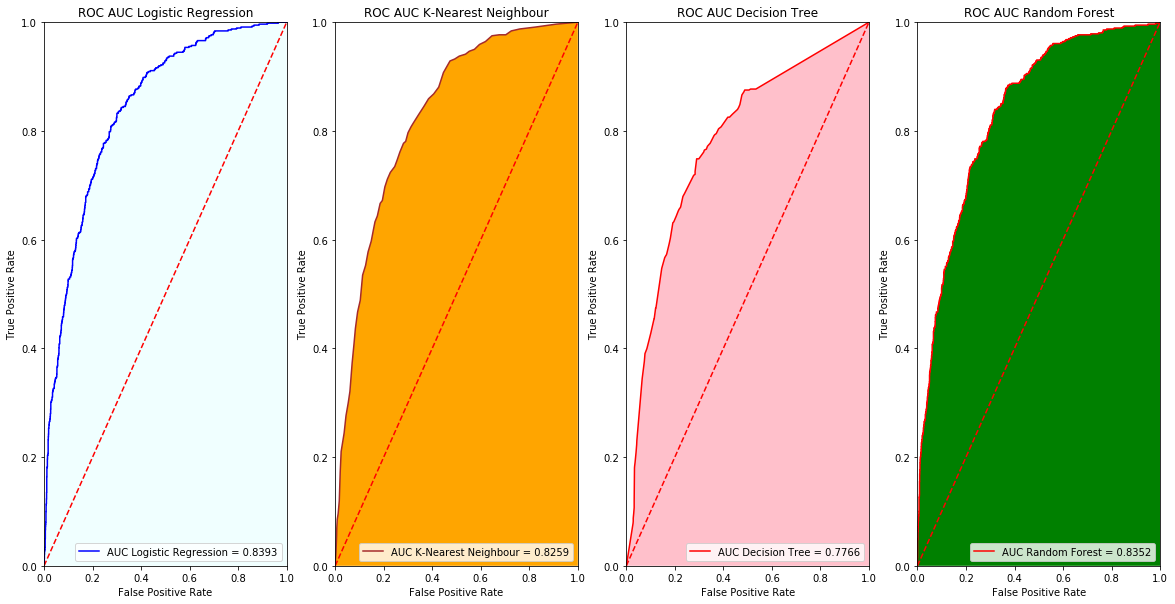

In [98]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_lr, tpr_lr, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_lr,tpr_lr, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(142)
plt.title('ROC AUC K-Nearest Neighbour')
plt.plot(fpr_knn, tpr_knn, 'brown', label='AUC K-Nearest Neighbour = {}'.format(round(roc_auc_knn,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knn,tpr_knn, 0, facecolor='orange', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(143)
plt.title('ROC AUC Decision Tree')
plt.plot(fpr_dtr, tpr_dtr, 'red', label='AUC Decision Tree = {}'.format(round(roc_auc_dtr,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtr,tpr_dtr, 0, facecolor='pink', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(144)
plt.title('ROC AUC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'red', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='green', alpha=1)
plt.legend(loc = 'lower right')

#### >> SMOTE

In [99]:
prob1_lrsm = proba_lrsm[:,1]
fpr_lrsm, tpr_lrsm, thres_lrsm = roc_curve(y_test, prob1_lrsm)
roc_auc_lrsm = auc(fpr_lrsm, tpr_lrsm)

prob1_dtrsm = proba_dtrsm[:,1]
fpr_dtrsm, tpr_dtrsm, thres_dtrsm = roc_curve(y_test, prob1_dtrsm)
roc_auc_dtrsm = auc(fpr_dtrsm, tpr_dtrsm)

prob1_knnsm = proba_knnsm[:,1]
fpr_knnsm, tpr_knnsm, thres_knnsm = roc_curve(y_test, prob1_knnsm)
roc_auc_knnsm = auc(fpr_knnsm, tpr_knnsm)

prob1_rfcsm = proba_rfcsm[:,1]
fpr_rfcsm, tpr_rfcsm, thres_rfcsm = roc_curve(y_test, prob1_rfcsm)
roc_auc_rfcsm = auc(fpr_rfcsm, tpr_rfcsm)

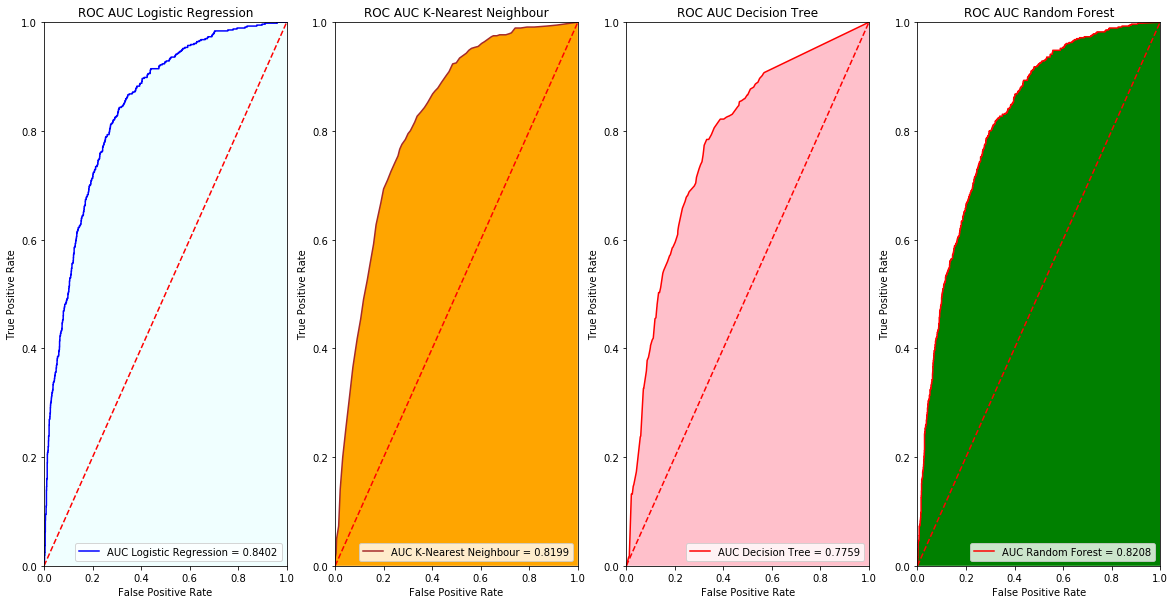

In [100]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_lrsm, tpr_lrsm, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lrsm,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_lrsm,tpr_lrsm, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(142)
plt.title('ROC AUC K-Nearest Neighbour')
plt.plot(fpr_knnsm, tpr_knnsm, 'brown', label='AUC K-Nearest Neighbour = {}'.format(round(roc_auc_knnsm,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knnsm,tpr_knnsm, 0, facecolor='orange', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(143)
plt.title('ROC AUC Decision Tree')
plt.plot(fpr_dtrsm, tpr_dtrsm, 'red', label='AUC Decision Tree = {}'.format(round(roc_auc_dtrsm,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtrsm,tpr_dtrsm, 0, facecolor='pink', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(144)
plt.title('ROC AUC Random Forest')
plt.plot(fpr_rfcsm, tpr_rfcsm, 'red', label='AUC Random Forest = {}'.format(round(roc_auc_rfcsm,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfcsm,tpr_rfcsm, 0, facecolor='green', alpha=1)
plt.legend(loc = 'lower right')

#### >> Oversampling

In [101]:
prob1_lrup = proba_lrup[:,1]
fpr_lrup, tpr_lrup, thres_lrup = roc_curve(y_test, prob1_lrup)
roc_auc_lrup = auc(fpr_lrup, tpr_lrup)

prob1_dtrup = proba_dtrup[:,1]
fpr_dtrup, tpr_dtrup, thres_dtrup = roc_curve(y_test, prob1_dtrup)
roc_auc_dtrup = auc(fpr_dtrup, tpr_dtrup)

prob1_knnup = proba_knnup[:,1]
fpr_knnup, tpr_knnup, thres_knnup = roc_curve(y_test, prob1_knnup)
roc_auc_knnup = auc(fpr_knnup, tpr_knnup)

prob1_rfcup = proba_rfcup[:,1]
fpr_rfcup, tpr_rfcup, thres_rfcup = roc_curve(y_test, prob1_rfcup)
roc_auc_rfcup = auc(fpr_rfcup, tpr_rfcup)

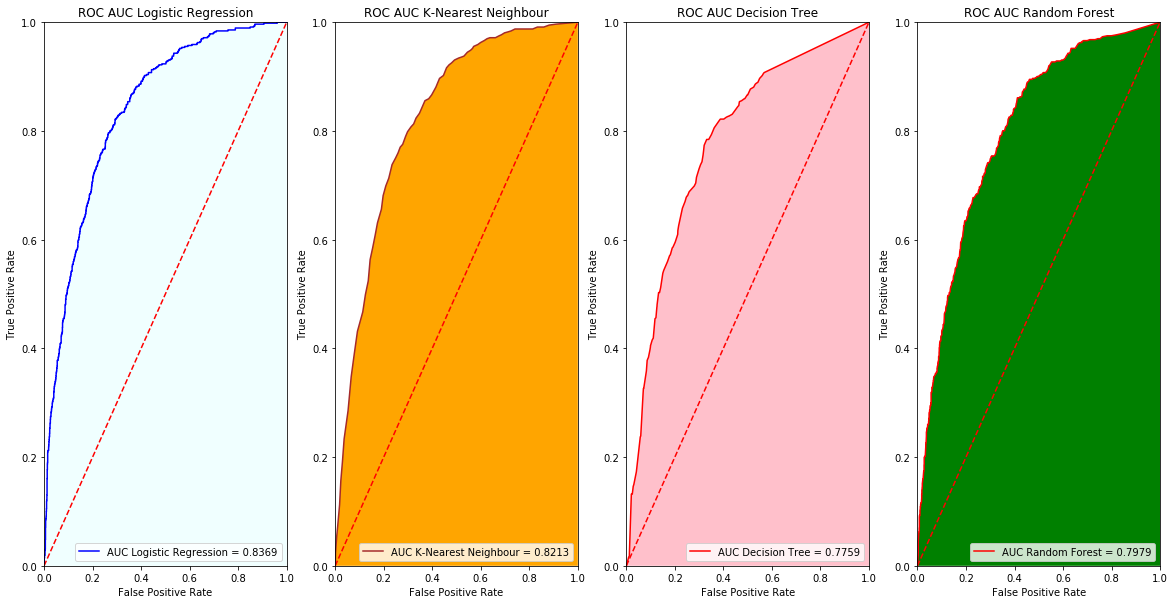

In [102]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_lrup, tpr_lrup, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lrup,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_lrup,tpr_lrup, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(142)
plt.title('ROC AUC K-Nearest Neighbour')
plt.plot(fpr_knnup, tpr_knnup, 'brown', label='AUC K-Nearest Neighbour = {}'.format(round(roc_auc_knnup,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knnup,tpr_knnup, 0, facecolor='orange', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(143)
plt.title('ROC AUC Decision Tree')
plt.plot(fpr_dtrup, tpr_dtrup, 'red', label='AUC Decision Tree = {}'.format(round(roc_auc_dtrup,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtrup,tpr_dtrup, 0, facecolor='pink', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(144)
plt.title('ROC AUC Random Forest')
plt.plot(fpr_rfcup, tpr_rfcup, 'red', label='AUC Random Forest = {}'.format(round(roc_auc_rfcup,4)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfcup,tpr_rfcup, 0, facecolor='green', alpha=1)
plt.legend(loc = 'lower right')

## 8. Classification Report

In [122]:
list = [['LogReg',scores_df['scores'][0],cm_lr[0,1],cr_lr['precision'][1],cr_lr['recall'][0]],
        ['KNN',scores_df['scores'][1],cm_knn[0,1],cr_knn['precision'][1],cr_knn['recall'][0]],
        ['DST',scores_df['scores'][2],cm_dtr[0,1],cr_dtr['precision'][1],cr_dtr['recall'][0]],
        ['RFC',scores_df['scores'][3],cm_rfc[0,1],cr_rfc['precision'][1],cr_rfc['recall'][0]],
        ['LogReg-SMOTE',scores_dfsm['scores'][0],cm_lrsm[0,1],cr_lrsm['precision'][1],cr_lrsm['recall'][0]],
        ['KNN-SMOTE',scores_dfsm['scores'][1],cm_knnsm[0,1],cr_knnsm['precision'][1],cr_knnsm['recall'][0]],
        ['DST-SMOTE',scores_dfsm['scores'][2],cm_dtrsm[0,1],cr_dtrsm['precision'][1],cr_dtrsm['recall'][0]],
        ['RFC-SMOTE',scores_dfsm['scores'][3],cm_rfcsm[0,1],cr_rfcsm['precision'][1],cr_rfcsm['recall'][0]],
        ['LogReg-Oversampling',scores_dfup['scores'][0],cm_lrup[0,1],cr_lrup['precision'][1],cr_lrup['recall'][0]],
        ['KNN-Oversampling',scores_dfup['scores'][1],cm_knnup[0,1],cr_knnup['precision'][1],cr_knnup['recall'][0]],
        ['DST-Oversampling',scores_dfup['scores'][2],cm_dtrup[0,1],cr_dtrup['precision'][1],cr_dtrup['recall'][0]],
        ['RFC-Oversampling',scores_dfup['scores'][3],cm_rfcup[0,1],cr_rfcup['precision'][1],cr_rfcup['recall'][0]]]
report=pd.DataFrame(list,columns=['model','Scores','False Positive','Precision +','Recall -'],
                   index=[i[0]for i in list])
report.drop('model',axis=1)

,Scores,False Positive,Precision +,Recall -
LogReg,0.794313,174,0.633684,0.887669
KNN,0.783886,230,0.592920,0.851517
DST,0.771564,208,0.579798,0.865720
RFC,0.794787,152,0.648148,0.901872
LogReg-SMOTE,0.779192,423,0.516571,0.726921
KNN-SMOTE,0.770891,570,0.453500,0.632021
DST-SMOTE,0.840897,401,0.490470,0.741123
RFC-SMOTE,0.986995,251,0.570205,0.837960
LogReg-Oversampling,0.765495,439,0.507295,0.716591
KNN-Oversampling,0.758578,538,0.464677,0.652679


From the results above, we can conclude that:
* If the company would like to doing promotion, they have to more focuse to FP (False Positive) since it has the lowest score means that this is the best score than others. We don't want to lose the opportunity to get the customer who keep to stay when giving the promotion.
* As we focuse on FP, then we will focus on Precision (+) and Recall (-) which both metrics have FP as one of the contributing factors.
 - Precision(+) = $\displaystyle \frac{TP}{TP+FP}$
 - Recall(-) = $\displaystyle \frac{TN}{TN+FP}$
* I choose Logistic Regression (Logreg) as the best estimator than other models as Logreg have the highest AUC score (0.84) even on non-SMOTE, SMOTE, or oversampling. Although, from the scoring, the RFC-Oversampling is the highest, but I think the data is too oversampled since the score is 0.99, almost 1.

In [123]:
lr_rand = logreg_random.best_estimator_

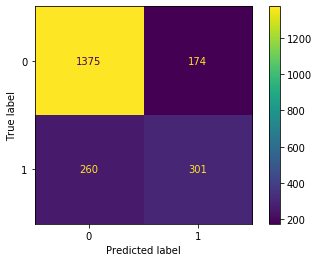

In [124]:
print(plot_confusion_matrix(lr_rand, X_test, y_test))

## 9. Import Best Model to Joblib

In [125]:
joblib.dump(best_lr, "modelfix")

['modelfix']